# Their code

## Importing Libraries

> Add blockquote



In [1]:
!pip install gplearn

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import gplearn
import matplotlib.pyplot as plt
import math

## Downloading Financial Data

In [3]:
stocks = ['DIA', 'SPY', 'GLD', 'AAPL', 'XOM', 'GOOG', 'F', 'IWM']
#Any random number of stocks can be added or dropped(Make sure to also edit portfoliostd function accordingly)

stocks = yf.download(stocks, start = "2014-01-01", end = "2024-01-01")
#Start and End time can be configured

[*********************100%***********************]  8 of 8 completed


## Creating Log Return Data Frame

In [4]:
#Creating a data frame with the log returns
stocks_lr = np.log(1+stocks["Adj Close"].pct_change())
stocks_lr.dropna()

Ticker,AAPL,DIA,F,GLD,GOOG,IWM,SPY,XOM
Date,,,,,,,,
2014-01-03 00:00:00+00:00,-0.022211,0.001705,0.004523,0.010873,-0.007322,0.005070,-0.000164,-0.002409
2014-01-06 00:00:00+00:00,0.005438,-0.003046,0.004503,0.001759,0.011088,-0.008142,-0.002902,0.001507
2014-01-07 00:00:00+00:00,-0.007177,0.006568,-0.012920,-0.005707,0.019095,0.008316,0.006123,0.014049
2014-01-08 00:00:00+00:00,0.006313,-0.003765,0.010350,-0.005909,0.002079,0.001307,0.000218,-0.003271
2014-01-09 00:00:00+00:00,-0.012853,-0.000974,0.019121,0.002874,-0.009677,0.000261,0.000654,-0.009775
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,-0.005563,-0.000214,0.000810,0.004425,0.006467,0.009275,0.002008,0.001768
2023-12-26 00:00:00+00:00,-0.002845,0.004138,0.008065,0.007592,0.000700,0.012920,0.004214,0.002254
2023-12-27 00:00:00+00:00,0.000518,0.003218,-0.004831,0.004528,-0.009709,0.003521,0.001806,-0.004710


## Creating Function to Calculate Portfolio Return

## Portfolio Return is given by:
### (Asset 1 Weight x Expected Return) + (Asset 2 Weight x Expected Return)..


In [5]:
#Function to calculate portfolio return
def portfolioreturn(weights):
    return np.dot(stocks_lr.mean(),weights)*252

## Function to Calculate Portfolio Standard Deviation (Risk)
## Portfolio Risk is given by(example for 3 asset portfolio):


In [6]:
def portfoliostd(weights):
    return (np.dot(np.dot(stocks_lr.cov(),weights),weights))**(1/2)*np.sqrt(252)


## Function to Generate Random Weights

In [7]:
def weightscreator(stocks_lr):
    rand = np.random.random(len(stocks_lr.columns))
    rand /= rand.sum()
    return rand

## Function to Find Returns and Standard Deviation for "i" Random Portfolio Weight Arrays

In [8]:
returns = []
stds = []
w = []

for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

## Using MatPlotLib To Plot the Efficient Frontier

## Where Efficient Frontier is the graph between Portfolio Risk and Return

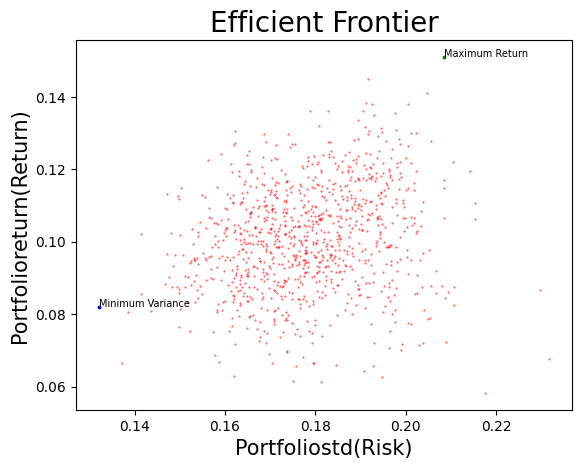

<Figure size 3000x2000 with 0 Axes>

In [9]:
plt.scatter(stds,returns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
plt.scatter(stds[returns.index(max(returns))], max(returns),c = "green", s=3) #Customise size for this too
plt.text(stds[returns.index(max(returns))],max(returns),"Maximum Return", fontsize=7) #Customise font size for this too
plt.scatter(min(stds),returns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
plt.text(min(stds),returns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
plt.title("Efficient Frontier", fontsize = 20)
plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
plt.figure(figsize=(30,20))
plt.show()

## Finding Max Returns and Associated Risk

In [10]:
print("Max return =", max(returns))
print("Corresponding Standard Deviation =", stds[returns.index(max(returns))])

Max return = 0.15100748497704083
Corresponding Standard Deviation = 0.208463038417107


## Creating a Function to Return Weights of Portfolios with Returns >= Max Returns According to Efficient Frontier

In [11]:
for i in range(10000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    if (portfolioreturn(weights) >= max(returns)):
        weight_new = weights
        print("Your Efficient Portfolio is:",weight_new) #Returns portfolio weights for above condition being satisfied
        break


Your Efficient Portfolio is: [0.32955786 0.1393137  0.03292934 0.05769026 0.27669054 0.06643742
 0.00626036 0.09112052]


In [12]:
print("Returns corresponding to weights found :",portfolioreturn(weight_new)) #Prints return of found weights
print("Risk associated with weights found :",portfoliostd(weight_new)) #Prints Risk of found weights

Returns corresponding to weights found : 0.15207547903300891
Risk associated with weights found : 0.20180068517938338


In [13]:
def create_fronteir_df(iterations):
  returns = []
  stds = []
  w = []
  sharpes = []

  for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)

    current_returns = portfolioreturn(weights)
    returns.append(current_returns)

    current_std = portfoliostd(weights)
    stds.append(portfoliostd(weights))

    w.append(weights)

    sharpes.append(current_returns/current_std)



  output = pd.DataFrame(
        {
            'Weights' : w,
            'Returns' : returns,
            'Std' : stds,
            'Sharpe Value': sharpes
        }
    )


  return output

In [14]:
df = create_fronteir_df(1000)

In [15]:
best_sharpe = df[df['Sharpe Value'] == df['Sharpe Value'].max()]

In [16]:
best_sharpe

,Weights,Returns,Std,Sharpe Value
608,"[0.2684605299901382, 0.14082134922497114, 0.04...",0.130107,0.161721,0.804517


# Our code

## Creating input data for modeling

In [17]:
def create_input_data(stocks_, start, end):
  stocks = yf.download(stocks_, start = start, end = end)

  stocks_lr = np.log(1+stocks["Adj Close"].pct_change())
  stocks_lr = stocks_lr.dropna()


  number_of_blocks = math.floor(len(stocks_lr) / 30)

  list_of_blocks = []
  prev_days = 0
  days = 30

  for block in range(number_of_blocks):
    stock_data = stocks_lr.iloc[prev_days:days, :]

    stock_data['date_range'] = str(min(stock_data.index)) + ' - ' + str(max(stock_data.index))

    data = pd.DataFrame(columns = ['stock', 'date_range', 'block', 'MA_10', 'MA_20', 'MA_30', 'returns', 'future_returns'])

    for i in range(8):
      stock = stock_data.columns[i]
      MA_10 = stock_data.iloc[-10:,i].mean()
      MA_20 = stock_data.iloc[-20:,i].mean()
      MA_30 = stock_data.iloc[:,i].mean()
      returns = stock_data.iloc[:,i].sum()
      date_range = stock_data['date_range'][0]
      future_returns = 0
      block_num = block
      row = [stock, date_range, block_num, MA_10, MA_20, MA_30, returns, future_returns]

      data.loc[len(data)] = row

    list_of_blocks.append(data)
    prev_days = prev_days + 30
    days = days + 30



  for block in range(number_of_blocks-1):
    for i in range(8):
        list_of_blocks[block].iloc[i,7] = list_of_blocks[block+1].iloc[i,6]


  list_of_blocks = list_of_blocks[:-1]

  combined = pd.concat(list_of_blocks, ignore_index=True)

  return combined




In [18]:
%%capture
training = create_input_data(['DIA', 'SPY', 'GLD', 'AAPL', 'XOM', 'GOOG', 'F', 'IWM'], start = "2014-01-01", end = "2019-01-01")

In [19]:
%%capture
testing = create_input_data(['DIA', 'SPY', 'GLD', 'AAPL', 'XOM', 'GOOG', 'F', 'IWM'], start = "2019-01-02", end = "2024-01-01")

In [20]:
training

,stock,date_range,block,MA_10,MA_20,MA_30,returns,future_returns
0,AAPL,2014-01-03 00:00:00+00:00 - 2014-02-14 00:00:0...,0,0.008909,-0.000636,-0.000356,-0.010694,-0.013417
1,DIA,2014-01-03 00:00:00+00:00 - 2014-02-14 00:00:0...,0,0.003041,-0.000693,-0.000489,-0.014663,0.020695
2,F,2014-01-03 00:00:00+00:00 - 2014-02-14 00:00:0...,0,0.001854,-0.004265,-0.000168,-0.005054,0.023347
3,GLD,2014-01-03 00:00:00+00:00 - 2014-02-14 00:00:0...,0,0.005713,0.002981,0.002489,0.074683,-0.028236
4,GOOG,2014-01-03 00:00:00+00:00 - 2014-02-14 00:00:0...,0,0.001832,0.001975,0.002583,0.077485,-0.075749
...,...,...,...,...,...,...,...,...
315,GLD,2018-08-27 00:00:00+00:00 - 2018-10-08 00:00:0...,39,-0.000823,-0.000270,-0.000476,-0.014292,0.027433
316,GOOG,2018-08-27 00:00:00+00:00 - 2018-10-08 00:00:0...,39,-0.002101,-0.000677,-0.002017,-0.060518,-0.119063
317,IWM,2018-08-27 00:00:00+00:00 - 2018-10-08 00:00:0...,39,-0.004531,-0.002553,-0.001866,-0.055973,-0.083478
318,SPY,2018-08-27 00:00:00+00:00 - 2018-10-08 00:00:0...,39,-0.001106,0.000177,0.000186,0.005594,-0.067252


In [21]:
model_train_X = training.iloc[:,3:7]
model_train_Y = training.iloc[:,7]

model_test_X = testing.iloc[:,3:7]
model_test_Y = testing.iloc[:,7]

results_df = pd.DataFrame(columns = ['Model', 'MSE'])

## Modeling

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

baseline = linear_model.LinearRegression()
baseline.fit(model_train_X, model_train_Y)

results1 = mean_squared_error(model_test_Y, baseline.predict(model_test_X))
row1 = ['LinearReg', results1]
results_df.loc[len(results_df)] = row1

In [23]:
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(model_train_X, model_train_Y)

results2 = mean_squared_error(model_test_Y, ridge.predict(model_test_X))
row2 = ['Ridge', results2]
results_df.loc[len(results_df)] = row2

In [24]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(model_train_X, model_train_Y)

results3 = mean_squared_error(model_test_Y, lasso.predict(model_test_X))
row3 = ['Lasso', results3]
results_df.loc[len(results_df)] = row3

In [25]:
lasso_lars = linear_model.LassoLarsCV(cv=5)
lasso_lars.fit(model_train_X, model_train_Y)

results4 = mean_squared_error(model_test_Y, lasso_lars.predict(model_test_X))
row4 = ['Lasso_lars', results4]
results_df.loc[len(results_df)] = row4

In [26]:
omp = linear_model.OrthogonalMatchingPursuit()
omp.fit(model_train_X, model_train_Y)

results5 = mean_squared_error(model_test_Y, omp.predict(model_test_X))
row5 = ['OMP', results5]
results_df.loc[len(results_df)] = row5

In [27]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(model_train_X, model_train_Y)

results6 = mean_squared_error(model_test_Y, RF.predict(model_test_X))
row6 = ['RF reg', results6]
results_df.loc[len(results_df)] = row6

In [28]:
from gplearn.genetic import SymbolicRegressor

SR = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
SR.fit(model_train_X, model_train_Y)

results7 = mean_squared_error(model_test_Y, SR.predict(model_test_X))
row7 = ['Symbolic Reg', results7]
results_df.loc[len(results_df)] = row7

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


KeyboardInterrupt: 

In [29]:
ridgeCV = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 0.4, 0.5, 0.6, 1])
ridgeCV.fit(model_train_X, model_train_Y)

results8 = mean_squared_error(model_test_Y, ridgeCV.predict(model_test_X))
row8 = ['Ridge CV', results8]
results_df.loc[len(results_df)] = row8

In [30]:
results_df

,Model,MSE
0,LinearReg,0.010473
1,Ridge,0.010485
2,Lasso,0.010518
3,Lasso_lars,0.010518
4,OMP,0.010487
5,RF reg,0.011296
6,Ridge CV,0.010488


# Using regression to calculate predicted reward and risk

In [31]:
testing

,stock,date_range,block,MA_10,MA_20,MA_30,returns,future_returns
0,AAPL,2019-01-03 00:00:00+00:00 - 2019-02-14 00:00:0...,0,0.003014,0.005087,0.002756,0.082684,0.106267
1,DIA,2019-01-03 00:00:00+00:00 - 2019-02-14 00:00:0...,0,0.001995,0.002712,0.003001,0.090023,0.020297
2,F,2019-01-03 00:00:00+00:00 - 2019-02-14 00:00:0...,0,-0.004414,0.001642,0.002701,0.081019,0.041867
3,GLD,2019-01-03 00:00:00+00:00 - 2019-02-14 00:00:0...,0,-0.000555,0.000727,0.000742,0.022251,-0.016662
4,GOOG,2019-01-03 00:00:00+00:00 - 2019-02-14 00:00:0...,0,0.000474,0.001848,0.002333,0.069989,0.045010
...,...,...,...,...,...,...,...,...
315,GLD,2023-08-28 00:00:00+00:00 - 2023-10-09 00:00:0...,39,-0.002785,-0.001592,-0.000913,-0.027396,0.059255
316,GOOG,2023-08-28 00:00:00+00:00 - 2023-10-09 00:00:0...,39,0.005398,0.000635,0.002175,0.065236,-0.011391
317,IWM,2023-08-28 00:00:00+00:00 - 2023-10-09 00:00:0...,39,-0.001501,-0.002658,-0.001707,-0.051198,0.030172
318,SPY,2023-08-28 00:00:00+00:00 - 2023-10-09 00:00:0...,39,0.000014,-0.001659,-0.000470,-0.014089,0.049573


In [32]:
predictions = baseline.predict(model_test_X)

testing['pred_future_returns'] = predictions

In [49]:
first = testing.iloc[:8,:]
second = testing.iloc[8:16,:]

In [50]:
second

,stock,date_range,block,MA_10,MA_20,MA_30,returns,future_returns,pred_future_returns
8,AAPL,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,0.002037,0.004107,0.003542,0.106267,-0.018677,0.007388
9,DIA,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,0.000305,-0.000142,0.000677,0.020297,-0.021487,0.006189
10,F,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,0.004068,-0.000057,0.001396,0.041867,0.153992,-0.002503
11,GLD,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,-0.000784,0.000053,-0.000555,-0.016662,0.005395,0.011697
12,GOOG,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,-0.000946,0.001397,0.001500,0.045010,-0.035816,0.010735
13,IWM,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,-0.000819,-0.001521,-0.000059,-0.001770,-0.009582,0.006424
14,SPY,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,0.000415,0.000586,0.001116,0.033489,-0.005752,0.006874
15,XOM,2019-02-15 00:00:00+00:00 - 2019-03-29 00:00:0...,1,0.000808,0.000498,0.001923,0.057698,-0.053670,0.003989


In [53]:
def transform_output(df):
  output = df[['stock', 'returns', 'pred_future_returns']].T

  output.columns = output.iloc[0]
  output = output.drop(output.index[0])

  return output

In [54]:
trans = transform_output(second)

In [55]:
trans

stock,AAPL,DIA,F,GLD,GOOG,IWM,SPY,XOM
returns,0.106267,0.020297,0.041867,-0.016662,0.04501,-0.00177,0.033489,0.057698
pred_future_returns,0.007388,0.006189,-0.002503,0.011697,0.010735,0.006424,0.006874,0.003989


Analyzing Returns Accomplished with Linear Regression

In [77]:
def predicted_returns(df, weights):
  return np.dot(df.iloc[1,:].T,weights)

def predicted_std(df, weights):
  return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)

In [78]:
def run_our_mpt(df, iterations):
  returns = []
  stds = []
  w = []
  pred_shaps = []

  for i in range(iterations): #Use the number of iterations you seem fit
      weights = weightscreator(df)
      returns.append(predicted_returns(df, weights))
      stds.append(predicted_std(df, weights))
      pred_shaps.append(predicted_returns(df, weights) / predicted_std(df, weights))
      w.append(weights)

  return pd.DataFrame({'weights' : w, 'returns' : returns,
                       'std' : stds, 'sharpe_ratio': pred_shaps})

In [80]:
Our_df = run_our_mpt(trans, 1000)

In [81]:
def get_best_ws(df):
  weights = list(df['weights'])
  sharpes = list(df['sharpe_ratio'])
  best_index = sharpes.index(max(sharpes))
  return weights[best_index]

In [85]:
def plot_frontier(df, title):
  returns = list(df['returns'])
  stds = list(df['std'])
  weights = list(df['weights'])


  plt.scatter(stds,returns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
  plt.scatter(stds[returns.index(max(returns))], max(returns),c = "green", s=3) #Customise size for this too
  plt.text(stds[returns.index(max(returns))],max(returns),"Maximum Return", fontsize=7) #Customise font size for this too
  plt.scatter(min(stds),returns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
  plt.text(min(stds),returns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
  plt.title(title, fontsize = 20)
  plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
  plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
  plt.figure(figsize=(30,20))
  plt.show()

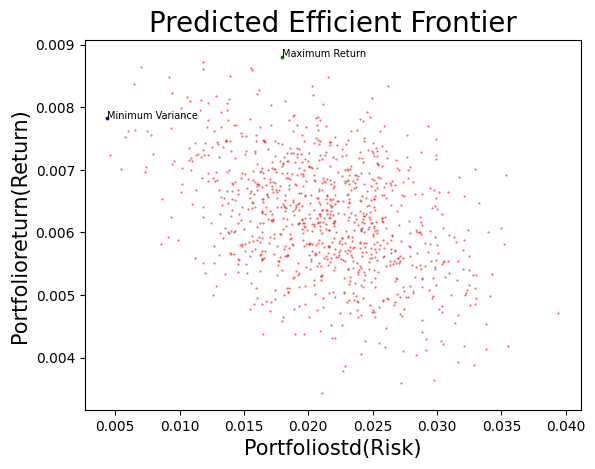

<Figure size 3000x2000 with 0 Axes>

In [86]:
plot_frontier(Our_df, "Predicted Efficient Frontier")

## Traditional

In [87]:
def portfolioreturnT(df, weights):
    return np.dot(df.mean(),weights)*252

def portfoliostdT(df, weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(252)

In [88]:
def run_tra_mpt(df, iterations):
  returns = []
  stds = []
  w = []
  shaps = []

  for i in range(1000): #Use the number of iterations you seem fit
      weights = weightscreator(stocks_lr)
      returns.append(portfolioreturnT(df, weights))
      stds.append(portfoliostdT(df,weights))
      w.append(weights)
      shaps.append(portfolioreturnT(df,weights) / portfoliostdT(df,weights))

  return pd.DataFrame({'weights' : w, 'returns' : returns,
                       'std' : stds, 'sharpe_ratio': shaps})


In [89]:
first = stocks_lr.iloc[1:31,:]
second = stocks_lr.iloc[31:61,:]

In [90]:
Trad = run_tra_mpt(first, 1000)
get_best_ws(Trad)

array([0.08528902, 0.19791047, 0.04259311, 0.3099201 , 0.22360154,
       0.01191397, 0.09991116, 0.02886063])

## Comparison

In [96]:
def compare_portfolios(our_weights, mpt_weights, test_df):
  our_returns = np.dot(test_df.sum(),our_weights)
  mpt_returns = np.dot(test_df.sum(),mpt_weights)

  print("Our Returns: ", our_returns)
  print("Traditional Returns: ", mpt_returns)


In [97]:
compare_portfolios(get_best_ws(Our_df), get_best_ws(Trad), second)

Our Returns:  0.0004388243154623883
Traditional Returns:  -0.0183511534768686


Functions to be utalized in the future

In [ ]:
def populate_ret_std_weight(returns, stds, weights):
  for i in range(1000): #Use the number of iterations you seem fit
      weights = weightscreator(reg_returns_data)
      returns.append(portfolioreturn(weights))
      stds.append(portfoliostd(weights))
      w.append(weights)

In [ ]:
def plot_frontier(returns, stds, weights):
  plt.scatter(stds,returns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
  plt.scatter(stds[returns.index(max(returns))], max(returns),c = "green", s=3) #Customise size for this too
  plt.text(stds[returns.index(max(returns))],max(returns),"Maximum Return", fontsize=7) #Customise font size for this too
  plt.scatter(min(stds),returns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
  plt.text(min(stds),returns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
  plt.title("Efficient Frontier", fontsize = 20)
  plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
  plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
  plt.figure(figsize=(30,20))
  plt.show()

In [ ]:
def create_frontier_df(my_returns, my_weights, iterations):
  returns, stds = list(), list()
  weights, sharpes = list(), list()

  for i in range(iterations):
    weights = weightscreator(my_returns)

    current_returns = portfolioreturn(my_weights)
    returns.append(current_returns)

    current_std = portfoliostd(my_weights)
    stds.append(portfoliostd(my_weights))

    weights.append(my_weights)

    sharpes.append(current_returns / current_std)

  return pd.DataFrame({'weights' : weights, 'returns' : returns,
                       'std' : stds, 'sharpe_ratio': sharpes})

In [ ]:
def get_max_return_risk(returns):
  print("Max Return: ", max(reg_returns))
  print("Standard Deviation (Risk): ", stds[returns.index(max(reg_returns))])

In [ ]:
reg_returns = list()
reg_stds = list()
reg_weights = list()

In [ ]:
populate_ret_std_weight(reg_returns, reg_stds, reg_weights)

NameError: name 'weightscreator' is not defined

ValueError: max() arg is an empty sequence

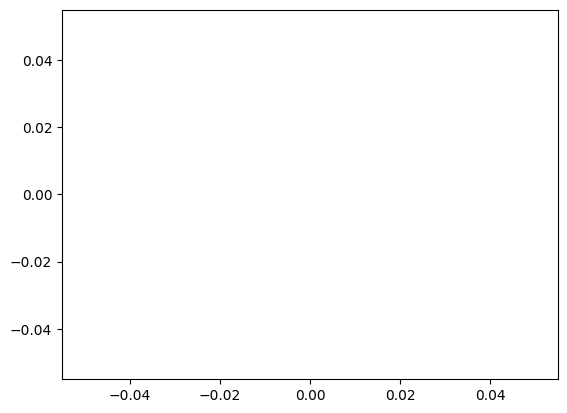

In [ ]:
plot_frontier(reg_returns, reg_stds, reg_weights)

In [ ]:
get_max_return_risk(reg_returns)

ValueError: max() arg is an empty sequence

In [ ]:
frontier_df = create_frontier_df(reg_returns_data, reg_weights, 1000)

NameError: name 'weightscreator' is not defined